# Proyek Analisis Data: [Bike-sharing-dataset]
- **Nama:** [Desti Nur Irawati]
- **Email:** [11221033@student.itk.ac.id]
- **ID Dicoding:** [desssti06]

## Menentukan Pertanyaan Bisnis

1.Bagaimana tren penggunaan sepeda berdasarkan musim (spring, summer, fall, winter)?
2.Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?
3.Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?
4.Seberapa besar pengaruh temperatur dan kelembaban terhadap jumlah penyewaan sepeda?
5.Bagaimana tren penyewaan sepeda dari tahun 2011 ke 2012?

## Import Semua Packages/Library yang Digunakan

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

## Data Wrangling

### Gathering Data

In [174]:
day_df = pd.read_csv("https://raw.githubusercontent.com/desssti06/Bike-sharing-dataset-/refs/heads/main/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [175]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/desssti06/Bike-sharing-dataset-/refs/heads/main/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- dalam proses gathering data terdapat 2 table yang akan digunakan
- kedua table ini nantinya akan di merge untuk melihat apa yang dapat diceritakan dari data set ini

### Assessing Data

#### menilai table day

In [176]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [177]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [178]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [179]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
pada table day cukup bersih, tidak ada data kosong dan juga duplikat

#### menilai table hour

In [180]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [181]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [182]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


In [183]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [184]:
**Insight:**
pada table hour cukup bersih, tidak ada data kosong dan juga duplikat

SyntaxError: invalid syntax (161323027.py, line 1)

### Cleaning Data

In [185]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [186]:
print("Jumlah duplikasi: ",day_df.duplicated().sum())

Jumlah duplikasi:  0


In [187]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [188]:
print("Jumlah duplikasi: ", hour_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
data set sangat bersih tidak perlu dilakukan cleaning data sehingga dapat melanjutkan ke tahap selanjutnya

## Exploratory Data Analysis (EDA)

#### Explore table day

In [189]:
day_df.sample(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
724,725,2012-12-25,1,1,12,1,2,0,2,0.291304,0.294465,0.734783,0.168726,440,573,1013
37,38,2011-02-07,1,0,2,0,1,1,1,0.271667,0.303658,0.738333,0.045408,120,1592,1712
125,126,2011-05-06,2,0,5,0,5,1,1,0.479167,0.474117,0.590000,0.228246,894,3714,4608
585,586,2012-08-08,3,1,8,0,3,1,2,0.750000,0.707717,0.672917,0.110700,1263,6271,7534
338,339,2011-12-05,4,0,12,0,1,1,2,0.385833,0.393925,0.827083,0.062208,233,3578,3811


In [190]:
day_df.groupby("season").size().reset_index(name="count").sort_values(by="count", ascending=False)

,season,count
2,3,188
1,2,184
0,1,181
3,4,178


#### insight 
dapat di ketahui penyewa terbanyak terdapat di season summer 
dengan catatan (1:springer, 2:summer, 3:fall, 4:winter)

In [191]:
day_df["dteday"] = pd.to_datetime(day_df["dteday"])

In [192]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [193]:
day_df.groupby("yr").size().reset_index(name="count").sort_values(by="count", ascending=False)

,yr,count
1,1,366
0,0,365


#### insight 
dapat di ketahui penyewa terbanyak terdapat di tahun 2012
(0: 2011, 1:2012)

In [194]:
day_df.groupby("mnth").size().reset_index(name="count").sort_values(by="count", ascending=False)

,mnth,count
0,1,62
2,3,62
6,7,62
4,5,62
11,12,62
9,10,62
7,8,62
3,4,60
8,9,60
5,6,60


#### insight 
dapat di ketahui penyewa di bulan 
1,3,7,5,12,10, dan 8 stabil di angka 62
4,9,6,11 di angka 60
dan 2 di angka 57

In [195]:
day_df.groupby("holiday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,holiday,count
0,0,710
1,1,21


#### insight 
dapat di ketahui penyewa terbanyak terdapat pada saat tidak holiday

In [196]:
day_df.groupby("weekday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weekday,count
0,0,105
1,1,105
6,6,105
2,2,104
3,3,104
4,4,104
5,5,104


#### insight 
dapat di ketahui tidak ada perbedaan signifikan tiap harinya

In [197]:
day_df.groupby("workingday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,workingday,count
1,1,500
0,0,231


#### insight 
dapat di ketahui penyewa terbanyak terdapat saat working day

In [198]:
day_df.groupby("weathersit").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weathersit,count
0,1,463
1,2,247
2,3,21


#### insight 
penyewa terbanyak pasa saat cuaca Clear, Few clouds, Partly cloudy, Partly cloudy
dengan catatan 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [199]:
day_df.groupby(["temp","hum"]).size().reset_index(name="count").sort_values(by="count", ascending=False)

,temp,hum,count
730,0.861667,0.492083,1
0,0.059130,0.400000,1
1,0.096522,0.436522,1
2,0.097391,0.491739,1
3,0.107500,0.414583,1
...,...,...,...
15,0.169091,0.686364,1
14,0.166667,0.419167,1
13,0.165000,0.535833,1
12,0.165000,0.470417,1


In [200]:
#### explore table hour

In [201]:
hour_df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
12919,12920,2012-06-27,3,1,6,12,0,3,1,1,0.76,0.6667,0.29,0.2985,77,245,322
9894,9895,2012-02-22,1,1,2,7,0,3,1,1,0.32,0.3333,0.76,0.0896,10,292,302
13413,13414,2012-07-18,3,1,7,2,0,3,1,1,0.74,0.6970,0.66,0.1343,3,5,8
16080,16081,2012-11-07,4,1,11,17,0,3,1,2,0.32,0.2879,0.53,0.3881,16,501,517
8546,8547,2011-12-27,1,0,12,20,0,2,1,1,0.32,0.3333,0.93,0.0896,3,66,69


In [202]:
hour_df.groupby("season").size().reset_index(name="count").sort_values(by="count", ascending=False)

,season,count
2,3,4496
1,2,4409
0,1,4242
3,4,4232


In [203]:
hour_df.groupby("yr").size().reset_index(name="count").sort_values(by="count", ascending=False)

,yr,count
1,1,8734
0,0,8645


In [204]:
hour_df.groupby("mnth").size().reset_index(name="count").sort_values(by="count", ascending=False)

,mnth,count
6,7,1488
4,5,1488
11,12,1483
7,8,1475
2,3,1473
9,10,1451
5,6,1440
3,4,1437
8,9,1437
10,11,1437


In [205]:
hour_df.groupby("hr").size().reset_index(name="count").sort_values(by="count", ascending=False)

,hr,count
16,16,730
17,17,730
15,15,729
14,14,729
13,13,729
12,12,728
18,18,728
19,19,728
20,20,728
21,21,728


In [206]:
hour_df.groupby("holiday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,holiday,count
0,0,16879
1,1,500


In [207]:
hour_df.groupby("weekday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weekday,count
6,6,2512
0,0,2502
5,5,2487
1,1,2479
3,3,2475
4,4,2471
2,2,2453


In [208]:
hour_df.groupby("workingday").size().reset_index(name="count").sort_values(by="count", ascending=False)

,workingday,count
1,1,11865
0,0,5514


In [209]:
hour_df.groupby("weathersit").size().reset_index(name="count").sort_values(by="count", ascending=False)

,weathersit,count
0,1,11413
1,2,4544
2,3,1419
3,4,3


In [210]:
hour_df.groupby(["temp", "hum"]).size().reset_index(name="count").sort_values(by="count", ascending=False)

,temp,hum,count
776,0.66,0.83,117
754,0.64,0.89,114
726,0.62,0.83,105
694,0.60,0.88,103
827,0.70,0.79,94
...,...,...,...
78,0.16,0.56,1
5,0.04,0.38,1
1028,0.88,0.40,1
1072,1.00,0.19,1


In [211]:
#### explore data day dan hour

In [212]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [213]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [214]:
all_data = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",
    left_on="instant",
    right_on="instant"
)
all_data.head()

,instant,dteday_x,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [215]:
all_data.to_csv("all_data.csv", index=False)

In [216]:
print(all_data.columns)

Index(['instant', 'dteday_x', 'season_x', 'yr_x', 'mnth_x', 'holiday_x',
       'weekday_x', 'workingday_x', 'weathersit_x', 'temp_x', 'atemp_x',
       'hum_x', 'windspeed_x', 'casual_x', 'registered_x', 'cnt_x', 'dteday_y',
       'season_y', 'yr_y', 'mnth_y', 'hr', 'holiday_y', 'weekday_y',
       'workingday_y', 'weathersit_y', 'temp_y', 'atemp_y', 'hum_y',
       'windspeed_y', 'casual_y', 'registered_y', 'cnt_y'],
      dtype='object')


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penggunaan sepeda berdasarkan musim (spring, summer, fall, winter)?

In [217]:
trend_musim = all_data.groupby("season_x")["cnt_x"].mean().reset_index()
trend_musim.head()

,season_x,cnt_x
0,1,2604.132597
1,2,4992.331522
2,3,5644.303191
3,4,4728.162921


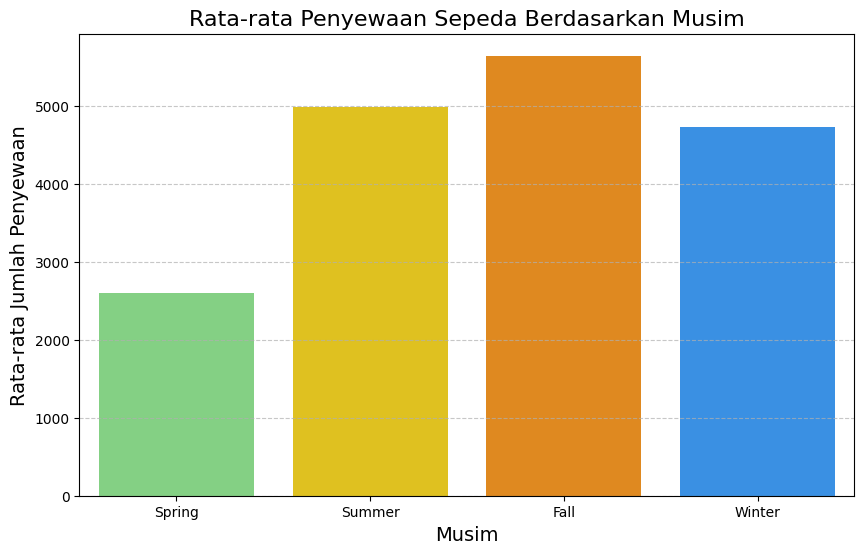

In [218]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Mapping angka musim ke label nama musim
season_labels = {1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"}

# Menghitung rata-rata jumlah penyewaan sepeda per musim
trend_musim["Musim"] = trend_musim["season_x"].map(season_labels)

# Custom warna untuk musim
custom_palette = {
    "Spring": "#77DD77",
    "Summer": "#FFD700",
    "Fall": "#FF8C00",
    "Winter": "#1E90FF"
}

# Membuat bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Musim", y="cnt_x", data=trend_musim, hue="Musim", palette=custom_palette, legend=False)

# Menambahkan judul dan label
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Musim", fontsize=16)
plt.xlabel("Musim", fontsize=14)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Menampilkan plot
plt.show()


### insight :
musim gugur merupakan musim dengan rata rata penyewa terbanyak

### Pertanyaan 2: Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda antara hari kerja dan akhir pekan?

In [234]:
trend_hari = all_data.groupby("workingday_x")["cnt_x"].mean().reset_index()
trend_hari["workingday_x"] = trend_hari["workingday_x"].map({0: "Akhir Pekan", 1: "Hari Kerja"})
trend_hari = trend_hari.sort_values(by="cnt_x", ascending=False)
print(trend_hari)

  workingday_x        cnt_x
1   Hari Kerja  4584.820000
0  Akhir Pekan  4330.168831


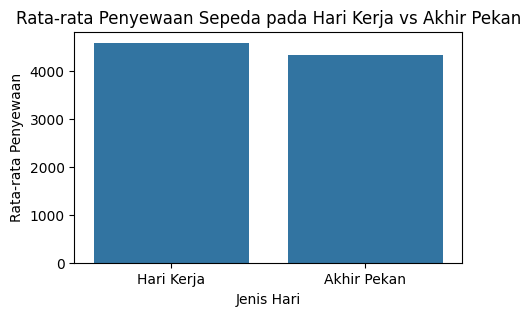

In [277]:
# Membuat barplot
plt.figure(figsize=(5,3))
sns.barplot(data=trend_hari, x="workingday_x", y="cnt_x", errorbar=None)

# Mengatur tampilan
plt.title("Rata-rata Penyewaan Sepeda pada Hari Kerja vs Akhir Pekan")
plt.xlabel("Jenis Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

#### insight
rata rata penyewa di hari kerja dan akhir pekan tidak memiliki perbedaan yang signifikan

### Pertanyaan 3: Bagaimana cuaca mempengaruhi jumlah penyewaan sepeda?

In [221]:
trend_cuaca = all_data.groupby("weathersit_x")["cnt_x"].mean().reset_index()
trend_cuaca.head(10)

,weathersit_x,cnt_x
0,1,4876.786177
1,2,4035.862348
2,3,1803.285714


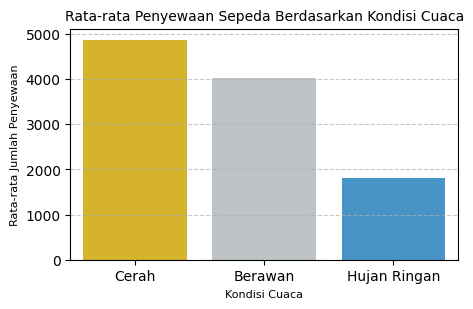

In [257]:
# Mapping label cuaca
weather_labels = {
    1: "Cerah",
    2: "Berawan",
    3: "Hujan Ringan",
    4: "Hujan Deras"
}

# Custom warna untuk setiap kondisi cuaca
custom_palette_weather = {
    "Cerah": "#F1C40F",        # Kuning
    "Berawan": "#BDC3C7",      # Abu-abu
    "Hujan Ringan": "#3498DB", # Biru
    "Hujan Deras": "#2C3E50"   # Biru Tua
}

# Pastikan kolom "Cuaca" sudah ada
trend_cuaca["Cuaca"] = trend_cuaca["weathersit_x"].map(weather_labels)

# Membuat barplot
plt.figure(figsize=(5, 3))
sns.barplot(
    x="Cuaca", 
    y="cnt_x", 
    hue="Cuaca",  # Solusi untuk FutureWarning
    data=trend_cuaca, 
    palette=custom_palette_weather, 
    legend=False
)

# Mengatur tampilan plot
plt.title("Rata-rata Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=10)
plt.xlabel("Kondisi Cuaca", fontsize=8)
plt.ylabel("Rata-rata Jumlah Penyewaan", fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

#### insight :
rata rata penyewa terbanyak pada saat cuaca cerah

### Pertanyaan 4: Seberapa besar pengaruh temperatur dan kelembaban terhadap jumlah penyewaan sepeda?

In [223]:
korelasi = all_data[['temp_x', 'hum_x', 'cnt_x']].corr()

In [224]:
korelasi.head()

,temp_x,hum_x,cnt_x
temp_x,1.000000,0.126963,0.627494
hum_x,0.126963,1.000000,-0.100659
cnt_x,0.627494,-0.100659,1.000000


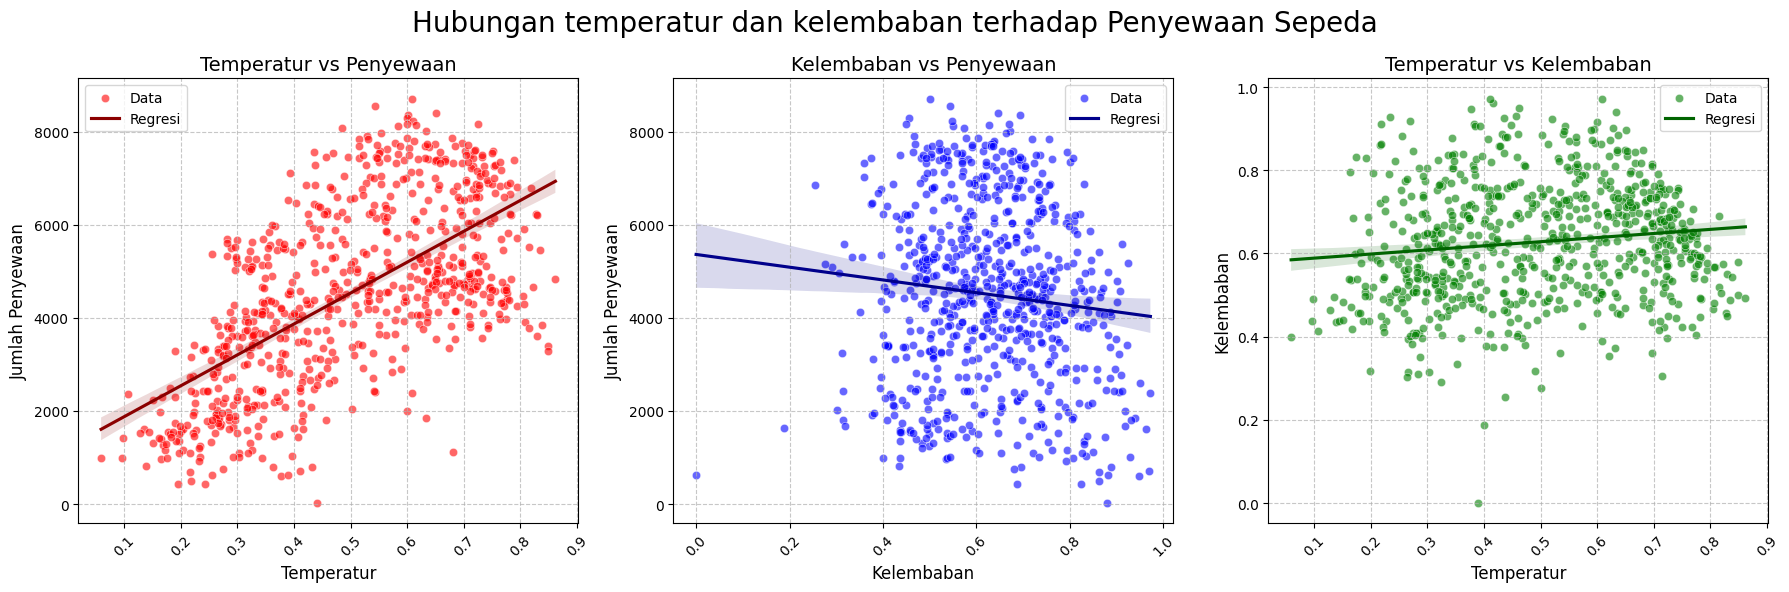

In [269]:

# Hitung korelasi
correlation = all_data[['temp_x', 'hum_x', 'cnt_x']].corr()

# Buat figure dan axes untuk 3 subplot dalam 1 baris
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot 1: Hubungan Temperatur dengan Jumlah Penyewaan Sepeda
sns.scatterplot(x=all_data["temp_x"], y=all_data["cnt_x"], alpha=0.6, color="red", label="Data", ax=ax[0]) 
sns.regplot(x=all_data["temp_x"], y=all_data["cnt_x"], line_kws={"color": "darkred"}, scatter=False, label="Regresi", ax=ax[0])
ax[0].set_title("Temperatur vs Penyewaan", fontsize=14)
ax[0].set_xlabel("Temperatur", fontsize=12)
ax[0].set_ylabel("Jumlah Penyewaan", fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(True, linestyle="--", alpha=0.7)
ax[0].legend()

# Plot 2: Hubungan Kelembaban dengan Jumlah Penyewaan Sepeda
sns.scatterplot(x=all_data["hum_x"], y=all_data["cnt_x"], alpha=0.6, color="blue", label="Data", ax=ax[1])
sns.regplot(x=all_data["hum_x"], y=all_data["cnt_x"], line_kws={"color": "darkblue"}, scatter=False, label="Regresi", ax=ax[1])
ax[1].set_title("Kelembaban vs Penyewaan", fontsize=14)
ax[1].set_xlabel("Kelembaban", fontsize=12)
ax[1].set_ylabel("Jumlah Penyewaan", fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(True, linestyle="--", alpha=0.7)
ax[1].legend()

sns.scatterplot(x=all_data["temp_x"], y=all_data["hum_x"], alpha=0.6, color="green", marker="o", label="Data", ax=ax[2])
sns.regplot(x=all_data["temp_x"], y=all_data["hum_x"], line_kws={"color": "darkgreen"}, scatter=False, label="Regresi", ax=ax[2])
ax[2].set_title("Temperatur vs Kelembaban", fontsize=14)
ax[2].set_xlabel("Temperatur", fontsize=12)
ax[2].set_ylabel("Kelembaban", fontsize=12)
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(True, linestyle="--", alpha=0.7)
ax[2].legend()

plt.suptitle("Hubungan temperatur dan kelembaban terhadap Penyewaan Sepeda", fontsize=20)

# Tampilkan plot
plt.tight_layout()
plt.show()


#### inshight
1. Ada korelasi positif cukup kuat antara suhu dan jumlah penyewaan sepeda. Artinya, semakin tinggi suhu, semakin banyak orang menyewa sepeda.
2. Korelasi negatif sangat lemah antara kelembaban dan jumlah penyewaan. Artinya, kelembaban tidak terlalu memengaruhi jumlah penyewaan sepeda.
3. Korelasi positif sangat lemah antara suhu dan kelembaban. Artinya, suhu sedikit berhubungan dengan kelembaban, tetapi tidak signifikan.

### Pertanyaan 5: Bagaimana tren penyewaan sepeda dari tahun 2011 ke 2012?

In [249]:
sewa_bulan = df.groupby(["year", "month"])["cnt_y"].sum().reset_index()
sewa_bulan.sample(5)

,year,month,cnt_y
0,2011,1,1040
14,2012,3,2443
10,2011,11,1544
16,2012,5,1583
6,2011,7,952


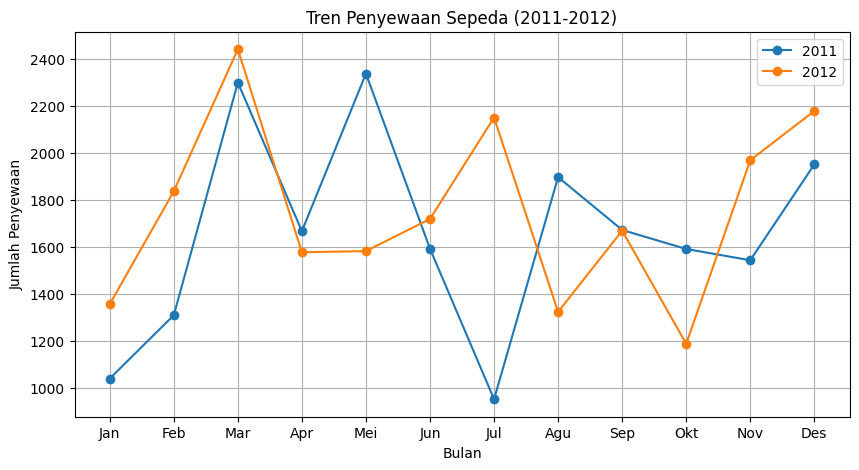

In [230]:
df["year"] = all_data["dteday_x"].dt.year
df["month"] = all_data["dteday_x"].dt.month

# Membuat line chart
plt.figure(figsize=(10, 5))
for year in [2011, 2012]:
    subset = sewa_bulan[sewa_bulan["year"] == year]
    plt.plot(subset["month"], subset["cnt_y"], marker="o", label=str(year))

# Pengaturan tampilan
plt.title("Tren Penyewaan Sepeda (2011-2012)")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Penyewaan")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"
])
plt.legend()
plt.grid(True)

# Menampilkan grafik
plt.show()


## Analisis Lanjutan (Opsional)

### Analisis RFM

#### Recency → Hari Sejak Terakhir Sewa
#### Frequency → Jumlah Penyewaan per Hari
#### Monetary → Total Penyewaan per Hari

In [93]:
# Baca dataset
df = pd.read_csv("all_data.csv")

# Konversi tanggal
df['dteday_x'] = pd.to_datetime(df['dteday_x'])

# Ambil tanggal terakhir
latest_date = df['dteday_x'].max()

# Hitung RFM berdasarkan tanggal
rfm = df.groupby('dteday_x').agg(
    Recency=('dteday_x', lambda x: (latest_date - x.max()).days),  # Hari sejak terakhir rental
    Frequency=('cnt_y', 'count'),  # Berapa kali rental terjadi dalam satu hari
    Monetary=('cnt_y', 'sum')  # Total rental dalam sehari
).reset_index()

print(rfm.columns)
print(rfm.head())


Index(['dteday_x', 'Recency', 'Frequency', 'Monetary'], dtype='object')
    dteday_x  Recency  Frequency  Monetary
0 2011-01-01      730          1        16
1 2011-01-02      729          1        40
2 2011-01-03      728          1        32
3 2011-01-04      727          1        13
4 2011-01-05      726          1         1


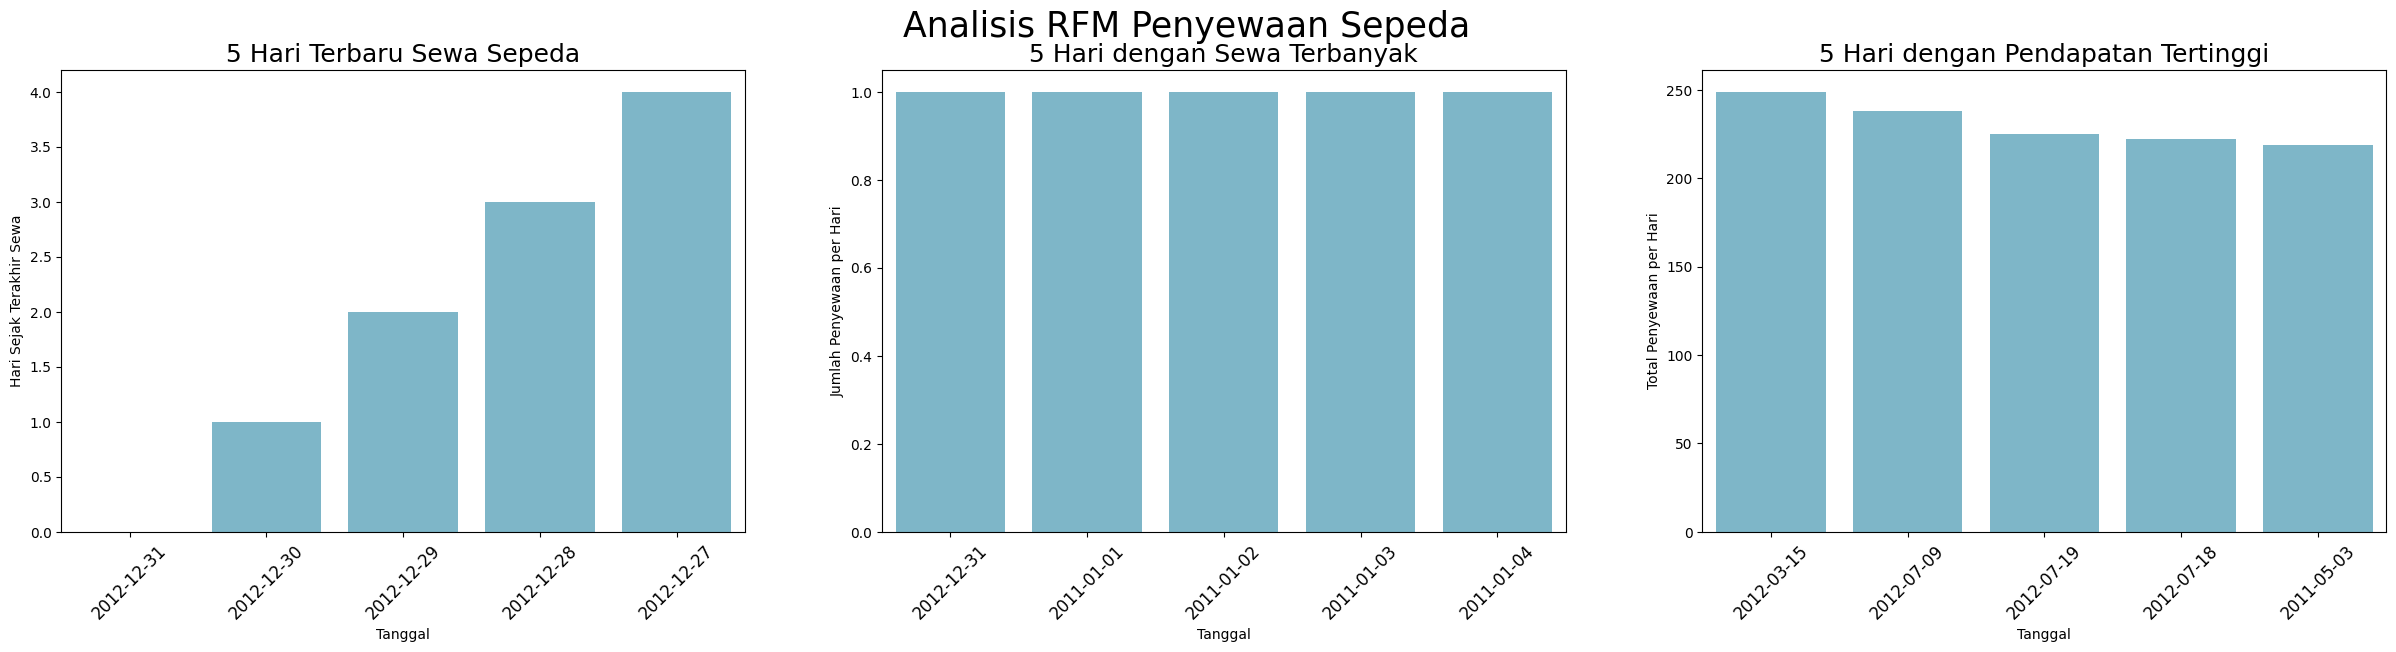

In [94]:
# Buat figure untuk subplot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

# Warna untuk bar plot
colors = ["#72BCD4"] * 5

# Bar plot untuk Recency
sns.barplot(
    y="Recency", x="dteday_x", hue="dteday_x",
    data=rfm.sort_values(by="Recency", ascending=True).head(5),
    palette=colors, ax=ax[0], legend=False
)
ax[0].set_title("5 Hari Terbaru Sewa Sepeda", fontsize=18)
ax[0].set_xlabel("Tanggal")
ax[0].set_ylabel("Hari Sejak Terakhir Sewa")
ax[0].tick_params(axis='x', labelsize=12, rotation=45)

# Bar plot untuk Frequency
sns.barplot(
    y="Frequency", x="dteday_x", hue="dteday_x",
    data=rfm.sort_values(by="Frequency", ascending=False).head(5),
    palette=colors, ax=ax[1], legend=False
)
ax[1].set_title("5 Hari dengan Sewa Terbanyak", fontsize=18)
ax[1].set_xlabel("Tanggal")
ax[1].set_ylabel("Jumlah Penyewaan per Hari")
ax[1].tick_params(axis='x', labelsize=12, rotation=45)

# Bar plot untuk Monetary
sns.barplot(
    y="Monetary", x="dteday_x", hue="dteday_x",
    data=rfm.sort_values(by="Monetary", ascending=False).head(5),
    palette=colors, ax=ax[2], legend=False
)
ax[2].set_title("5 Hari dengan Pendapatan Tertinggi", fontsize=18)
ax[2].set_xlabel("Tanggal")
ax[2].set_ylabel("Total Penyewaan per Hari")
ax[2].tick_params(axis='x', labelsize=12, rotation=45)

# Tambahkan judul utama
plt.suptitle("Analisis RFM Penyewaan Sepeda", fontsize=25)

# Tampilkan plot
plt.show()


## Conclusion

Terjadi Peningkatan Penyewaan di 2012
Jumlah penyewaan sepeda pada tahun 2012 lebih tinggi dibandingkan tahun 2011, terutama pada bulan-bulan awal dan akhir tahun. Hal ini menunjukkan adanya tren peningkatan penggunaan sepeda dari tahun ke tahun.

Penyewaan Sepeda Cenderung Naik-Turun dan Tidak Stabil
Pada kedua tahun, jumlah penyewaan mengalami fluktuasi yang cukup besar, dengan beberapa lonjakan tinggi dan penurunan tajam.

Maret 2011 & 2012 Terjadi lonjakan tinggi.
Juni & Juli 2011 Terjadi penurunan drastis.
Musim atau Cuaca Berpengaruh

Penyewaan meningkat di bulan Maret-Mei dan Oktober-Desember.
Juli 2011 & Oktober 2012 mengalami penurunan tajam, kemungkinan dipengaruhi oleh faktor cuaca atau musim.